In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from collections import Counter # coomon kelimeleri bulur

In [2]:
import nltk
nltk.download("punkt")
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download("averaged_perceptron_tagger")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\walke\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\walke\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\walke\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\walke\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\walke\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\walke\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]    

True

In [3]:
df = pd.read_csv("train.tsv", sep = "\t")

In [4]:
df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [5]:
df["Sentiment"].unique()

array([1, 2, 3, 4, 0], dtype=int64)

<AxesSubplot:>

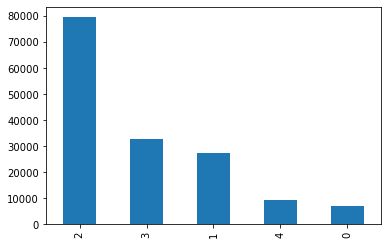

In [6]:
df["Sentiment"].value_counts().plot.bar()

In [7]:
df["Sentiment"].replace({0:"negative", 1:"negative", 3:"positive", 4:"positive"}, inplace =True)

In [8]:
df = df[df["Sentiment"] !=2]

In [9]:
df

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,negative
21,22,1,good for the goose,positive
22,23,1,good,positive
33,34,1,"the gander , some of which occasionally amuses...",negative
46,47,1,amuses,positive
...,...,...,...,...
156047,156048,8544,quietly suggesting the sadness and obsession b...,negative
156051,156052,8544,sadness and obsession,negative
156052,156053,8544,sadness and,negative
156056,156057,8544,forced avuncular chortles,negative


In [10]:
df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,negative
21,22,1,good for the goose,positive
22,23,1,good,positive
33,34,1,"the gander , some of which occasionally amuses...",negative
46,47,1,amuses,positive


<AxesSubplot:>

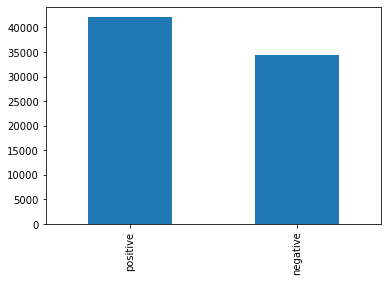

In [11]:
df["Sentiment"].value_counts().plot.bar()

In [12]:
df.rename({"Phrase":"sentences", "Sentiment":"label"}, axis=1, inplace =True)

In [13]:
df.head()

,PhraseId,SentenceId,sentences,label
0,1,1,A series of escapades demonstrating the adage ...,negative
21,22,1,good for the goose,positive
22,23,1,good,positive
33,34,1,"the gander , some of which occasionally amuses...",negative
46,47,1,amuses,positive


In [14]:
df.drop(["PhraseId", "SentenceId"], axis =1, inplace = True)

In [15]:
df

,sentences,label
0,A series of escapades demonstrating the adage ...,negative
21,good for the goose,positive
22,good,positive
33,"the gander , some of which occasionally amuses...",negative
46,amuses,positive
...,...,...
156047,quietly suggesting the sadness and obsession b...,negative
156051,sadness and obsession,negative
156052,sadness and,negative
156056,forced avuncular chortles,negative


In [16]:
c = pd.Series(" ".join(df["sentences"]).split()).value_counts()[pd.Series(" ".join(df["sentences"]).split()).value_counts() <=2]
c.index[1]

'voyage'

In [17]:
" ".join(x for x in df["sentences"][0].split() if x not in c.index)

'A series of demonstrating the adage that what is good for the goose is also good for the , some of which occasionally amuses but none of which amounts to much of a story .'

In [18]:
df["sentence"] = df["sentences"].apply(lambda x: " ".join(i for i in x.split() if i not in c.index))

In [19]:
c.index.sort_values()

Index([''n'', '1.2', '100-year', '10th', '127', '15th', '168-minute', '19',
       '1915', '1930s',
       ...
       'wraps', 'wrinkles', 'xtc', 'ya', 'yarns', 'yung', 'zealously',
       'zeroes', 'zip', 'zombie-land'],
      dtype='object', length=2242)

In [20]:
df["sentence"][:5]

0     A series of demonstrating the adage that what ...
21                                   good for the goose
22                                                 good
33    the , some of which occasionally amuses but no...
46                                               amuses
Name: sentence, dtype: object

In [21]:
stop_words = stopwords.words('english')

In [22]:
def cleaning(data):
    
    text_tokens=nltk.word_tokenize(data.lower()) # removed .lower()
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
    return " ".join(text_cleaned) # web ebbedingte join kullanılmıyor.

In [23]:
df["sentences"] = df["sentences"].apply(cleaning)

**Test-Train Split**

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X = df["sentences"]
y = df["label"]
y = y.map({"positive":1, "negative":0})

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, stratify = y, random_state = 42)

**Count Vectors**

In [27]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train)

CountVectorizer()

In [28]:
vectorizer.get_feature_names()[:10]

['aaa',
 'aaliyah',
 'aan',
 'abagnale',
 'abandon',
 'abandoned',
 'abbass',
 'abbott',
 'abbreviated',
 'abc']

In [29]:
X_train_count = vectorizer.transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [30]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [31]:
a = pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names())
a

,aaa,aaliyah,aan,abagnale,abandon,abandoned,abbass,abbott,abbreviated,abc,...,ziyi,zoe,zombie,zone,zoning,zoolander,zoom,zucker,zwick,zzzzzzzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61177,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
61178,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
61179,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
61180,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
a.shape

(61182, 12842)

In [33]:
a.head()

,aaa,aaliyah,aan,abagnale,abandon,abandoned,abbass,abbott,abbreviated,abc,...,ziyi,zoe,zombie,zone,zoning,zoolander,zoom,zucker,zwick,zzzzzzzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


** TF-IDF*

In [34]:
tf_idf_vectorizer = TfidfVectorizer()
tf_idf_vectorizer.fit(X_train)

TfidfVectorizer()

In [35]:
tf_idf_vectorizer.get_feature_names()[:10]

['aaa',
 'aaliyah',
 'aan',
 'abagnale',
 'abandon',
 'abandoned',
 'abbass',
 'abbott',
 'abbreviated',
 'abc']

In [36]:
X_train_tf_idf = tf_idf_vectorizer.transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [37]:
b = pd.DataFrame(X_train_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names())
b

,aaa,aaliyah,aan,abagnale,abandon,abandoned,abbass,abbott,abbreviated,abc,...,ziyi,zoe,zombie,zone,zoning,zoolander,zoom,zucker,zwick,zzzzzzzzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [59]:
logmodel_count = LogisticRegression(C = 10)
logmodel_count.fit(X_train_count, y_train)

LogisticRegression(C=10)

In [60]:
y_pred = logmodel_count.predict(X_test_count)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[5790 1079]
 [ 732 7695]]
              precision    recall  f1-score   support

           0       0.89      0.84      0.86      6869
           1       0.88      0.91      0.89      8427

    accuracy                           0.88     15296
   macro avg       0.88      0.88      0.88     15296
weighted avg       0.88      0.88      0.88     15296



In [61]:
accuracy = cross_val_score(logmodel_count, X_test_count, y_test, cv = 10).mean()
print("Count Vectors Accuracy :", accuracy)

Count Vectors Accuracy : 0.8202814432945622


In [68]:
logmodel_tf_idf = LogisticRegression(C =8)
logmodel_tf_idf.fit(X_train_tf_idf, y_train)

LogisticRegression(C=8)

In [69]:
y_pred = logmodel_tf_idf.predict(X_test_tf_idf)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[5826 1043]
 [ 800 7627]]
              precision    recall  f1-score   support

           0       0.88      0.85      0.86      6869
           1       0.88      0.91      0.89      8427

    accuracy                           0.88     15296
   macro avg       0.88      0.88      0.88     15296
weighted avg       0.88      0.88      0.88     15296



In [70]:
accuracy = cross_val_score(logmodel_tf_idf, X_test_tf_idf, y_test, cv = 10).mean()
print("Count Vectors Accuracy :", accuracy)

Count Vectors Accuracy : 0.8236804780774312


In [97]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(100, n_jobs = -1, min_samples_split =3, random_state = 42).fit(X_train_count, y_train)
y_pred = rf_model.predict(X_test_count)
confusion_matrix(y_test, y_pred)

array([[5930,  939],
       [ 643, 7784]], dtype=int64)

In [98]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88      6869
           1       0.89      0.92      0.91      8427

    accuracy                           0.90     15296
   macro avg       0.90      0.89      0.90     15296
weighted avg       0.90      0.90      0.90     15296



In [47]:
from sklearn.ensemble import GradientBoostingClassifier

In [54]:
from xgboost import XGBClassifier

In [71]:
xgb_model = XGBClassifier(n_estimators = 2500,  learning_rate = 0.4, max_depth = 411, subsample =0.8, n_jobs = -1, min_samples_split = 1 ).fit(X_train_count, y_train, 
             early_stopping_rounds=15,
             eval_set=[(X_test_count, y_test)],
             verbose=True)

[0]	validation_0-error:0.263533
Will train until validation_0-error hasn't improved in 15 rounds.
[1]	validation_0-error:0.237775
[2]	validation_0-error:0.220254
[3]	validation_0-error:0.204171
[4]	validation_0-error:0.19613
[5]	validation_0-error:0.18312
[6]	validation_0-error:0.177759
[7]	validation_0-error:0.172137
[8]	validation_0-error:0.165664
[9]	validation_0-error:0.161872
[10]	validation_0-error:0.157165
[11]	validation_0-error:0.154354
[12]	validation_0-error:0.152001
[13]	validation_0-error:0.149059
[14]	validation_0-error:0.146967
[15]	validation_0-error:0.145986
[16]	validation_0-error:0.143763
[17]	validation_0-error:0.142782
[18]	validation_0-error:0.140429
[19]	validation_0-error:0.139121
[20]	validation_0-error:0.138533
[21]	validation_0-error:0.136506
[22]	validation_0-error:0.136049
[23]	validation_0-error:0.13546
[24]	validation_0-error:0.134087
[25]	validation_0-error:0.133695
[26]	validation_0-error:0.13278
[27]	validation_0-error:0.132126
[28]	validation_0-error:

In [72]:
y_pred = xgb_model.predict(X_test_count)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[5644 1225]
 [ 617 7810]]
              precision    recall  f1-score   support

           0       0.90      0.82      0.86      6869
           1       0.86      0.93      0.89      8427

    accuracy                           0.88     15296
   macro avg       0.88      0.87      0.88     15296
weighted avg       0.88      0.88      0.88     15296



In [57]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier().fit(X_train_count, y_train)
y_pred = dt_model.predict(X_test_count)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[5739 1130]
 [ 778 7649]]
              precision    recall  f1-score   support

           0       0.88      0.84      0.86      6869
           1       0.87      0.91      0.89      8427

    accuracy                           0.88     15296
   macro avg       0.88      0.87      0.87     15296
weighted avg       0.88      0.88      0.87     15296



In [58]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier().fit(X_train_count, y_train)
y_pred = knn_model.predict(X_test_count)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

MemoryError: Unable to allocate 1.00 GiB for an array with shape (2193, 61182) and data type float64